In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the CUSTOMER CHURN PROBLEM dataset

iit= pd.read_csv(r"C:\Users\Dlc\Downloads\data.csv (1)\data.csv",header=0)

# Copy to back-uo file

iit_bk = iit.copy()

# Display first 5 records

iit.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [3]:
#display dataset information
iit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [4]:
#display the unique values of all variables
iit.nunique()

id                  25458
year                    6
institute_type          2
round_no                4
quota                   7
pool                    2
institute_short        54
program_name          130
program_duration        2
degree_short           13
category               10
opening_rank        10984
closing_rank        11940
is_preparatory          2
dtype: int64

In [5]:
list(iit['year'].unique())

[2016, 2017, 2018, 2019, 2020, 2021]

In [6]:
iit['institute_short'].unique()

array(['IIT-Bombay', 'IIT-Delhi', 'IIT-Kharagpur', 'IIT-Kanpur',
       'IIT-Madras', 'IIT-Roorkee', 'IIT-Guwahati', 'IIT-Indore',
       'IIT-Hyderabad', 'IIT-(BHU) Varanasi', 'IIT-Patna',
       'IIT-(ISM) Dhanbad', 'IIT-Bhubaneswar', 'IIT-Mandi',
       'IIT-Gandhinagar', 'IIT-Ropar', 'IIT-Jodhpur', 'IIT-Tirupati',
       'IIT-Bhilai', 'IIT-Dharwad', 'IIT-Goa', 'IIT-Jammu',
       'IIT-Palakkad', 'NIT-Warangal', 'NIT-Tiruchirappalli',
       'NIT-Uttarakhand', 'NIT-Surat', 'NIT-Nagpur', 'NIT-Andhra-Pradesh',
       'NIT-Jalandhar', 'NIT-Jaipur', 'NIT-Bhopal', 'NIT-Allahabad',
       'NIT-Calicut', 'NIT-Agartala', 'NIT-Delhi', 'NIT-Durgapur',
       'NIT-Goa', 'NIT-Hamirpur', 'NIT-Meghalaya',
       'NIT-Karnataka-Surathkal', 'NIT-Patna', 'NIT-Nagaland',
       'NIT-Puducherry', 'NIT-Raipur', 'NIT-Sikkim',
       'NIT-Arunachal-Pradesh', 'NIT-Jamshedpur', 'NIT-Kurukshetra',
       'NIT-Manipur', 'NIT-Mizoram', 'NIT-Rourkela', 'NIT-Silchar',
       'NIT-Srinagar'], dtype=object)

In [7]:
# to display number of rows and columns
iit.shape

(64958, 14)

In [8]:
 #displaying duplicate values with in dataset

iit_dup=iit[iit.duplicated(keep='last')]
                       
#display the duplicate records
                       
iit_dup                     

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
9205,9206,2021,IIT,1,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,123,2003,0
9206,9207,2021,IIT,1,AI,Female-Only,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,702,4419,0
9207,9208,2021,IIT,1,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,389,1123,0
9208,9209,2021,IIT,1,AI,Female-Only,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,1618,2505,0
9209,9210,2021,IIT,1,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,129,579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64903,31136,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,SC,14185,24048,0
64904,31137,2021,NIT,1,JK,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,2736,4171,0
64905,31138,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,10870,10870,0
64906,31139,2021,NIT,1,LA,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,GEN,166453,265454,0


In [9]:
#display dataset information
iit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [10]:
#display concrete data information

iit.describe()

,id,year,round_no,opening_rank,closing_rank,is_preparatory
count,64958.000000,64958.000000,64958.000000,6.495800e+04,6.495800e+04,64958.000000
mean,18171.173389,2020.421580,2.609348,8.259642e+03,1.070497e+04,0.047631
std,9619.123659,1.149762,2.422558,2.679448e+04,3.788101e+04,0.212985
min,1.000000,2016.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,10378.000000,2020.000000,1.000000,6.710000e+02,8.320000e+02,0.000000
50%,13084.500000,2021.000000,1.000000,2.309000e+03,2.764500e+03,0.000000
75%,28434.000000,2021.000000,6.000000,6.932000e+03,8.190000e+03,0.000000
max,31140.000000,2021.000000,7.000000,1.082601e+06,1.144790e+06,1.000000


In [11]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)
is_preparatory_count = iit.is_preparatory.value_counts()
print('Class 0:', is_preparatory_count[0])
print('Class 1:', is_preparatory_count[1])
print('Proportion:', round(is_preparatory_count[0] / is_preparatory_count[1], 2), ': 1')
print('Total Bank records:', len(iit))

Class 0: 61864
Class 1: 3094
Proportion: 19.99 : 1
Total Bank records: 64958


In [12]:
# display all the columns in dataset

iit.columns

Index(['id', 'year', 'institute_type', 'round_no', 'quota', 'pool',
       'institute_short', 'program_name', 'program_duration', 'degree_short',
       'category', 'opening_rank', 'closing_rank', 'is_preparatory'],
      dtype='object')

In [13]:
#count the missing values by each variable if available
iit.isnull().sum()

id                  0
year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64

In [14]:
#display dataset information
iit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [15]:
#use label encoder to handle categorical data

from sklearn.preprocessing import LabelEncoder 
LE= LabelEncoder()
iit['institute_type']=LE.fit_transform(iit[['institute_type']])
iit['quota']=LE.fit_transform(iit[['quota']])
iit['pool']=LE.fit_transform(iit[['pool']])
iit['institute_short']=LE.fit_transform(iit[['institute_short']])
iit['program_name']=LE.fit_transform(iit[['program_name']])
iit['program_duration']=LE.fit_transform(iit[['program_duration']])
iit['degree_short']=LE.fit_transform(iit[['degree_short']])
iit['category']=LE.fit_transform(iit[['category']])


In [16]:
# identify the Independet and taregt variables

#identify the independent and target (dependent) variables

IndepVar =[]
for col in iit.columns:
    if col!='is_preparatory':
        IndepVar.append(col)
        
TargetVar='is_preparatory'

x=iit[IndepVar]
y=iit[TargetVar]

In [17]:
#split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#display the shape for train &test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45470, 13), (19488, 13), (45470,), (19488,))

In [18]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [19]:
#To build the 'Random Forest  'model with random sampling

from sklearn.ensemble import RandomForestClassifier

#create an object for  model

ModelRF=RandomForestClassifier()
#ModelDT=DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, 
#                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

#TRAIN THE MODEL TRAIN DATA

ModelRF.fit(x_train,y_train)

#predict the model with test dataset

y_pred=ModelRF.predict(x_test)
y_pred_prob=ModelRF.predict_proba(x_test)


# knn model

In [20]:
#load the result dataset for knn

KNN_Results= pd.read_csv(r"C:\Users\Dlc\data52\KNN_results.csv" ,header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[  851    74]
 [   52 18511]]
Outcome values : 
 851 74 52 18511
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.92      0.93       925
           0       1.00      1.00      1.00     18563

    accuracy                           0.99     19488
   macro avg       0.97      0.96      0.96     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.4 %
Precision : 94.2 %
Recall : 92.0 %
F1 Score : 0.931
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 95.8 %
MCC : 0.928
roc_auc_score: 0.959


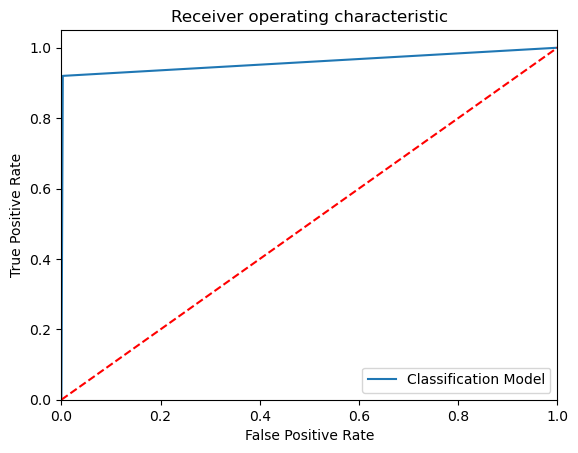

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  804   121]
 [   22 18541]]
Outcome values : 
 804 121 22 18541
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.87      0.92       925
           0       0.99      1.00      1.00     18563

    accuracy                           0.99     19488
   macro avg       0.98      0.93      0.96     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.3 %
Precision : 97.3 %
Recall : 86.9 %
F1 Score : 0.918
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 93.4 %
MCC : 0.916
roc_auc_score: 0.934


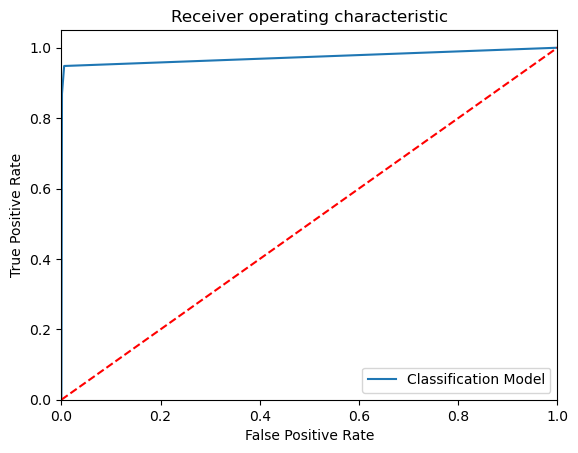

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[  829    96]
 [   54 18509]]
Outcome values : 
 829 96 54 18509
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.90      0.92       925
           0       0.99      1.00      1.00     18563

    accuracy                           0.99     19488
   macro avg       0.97      0.95      0.96     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.2 %
Precision : 93.9 %
Recall : 89.6 %
F1 Score : 0.917
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 94.6 %
MCC : 0.913
roc_auc_score: 0.947


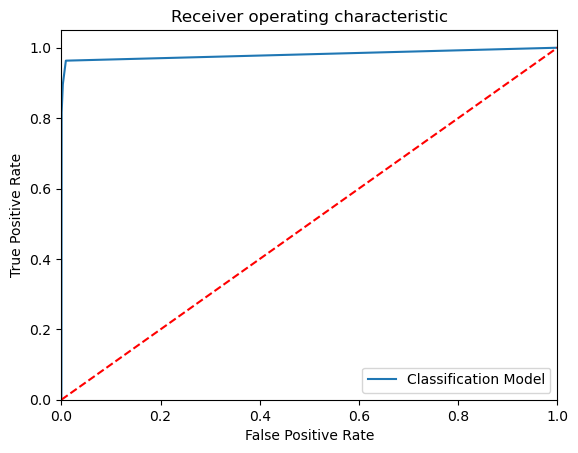

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  768   157]
 [   30 18533]]
Outcome values : 
 768 157 30 18533
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.83      0.89       925
           0       0.99      1.00      0.99     18563

    accuracy                           0.99     19488
   macro avg       0.98      0.91      0.94     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.0 %
Precision : 96.2 %
Recall : 83.0 %
F1 Score : 0.891
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 91.4 %
MCC : 0.889
roc_auc_score: 0.914


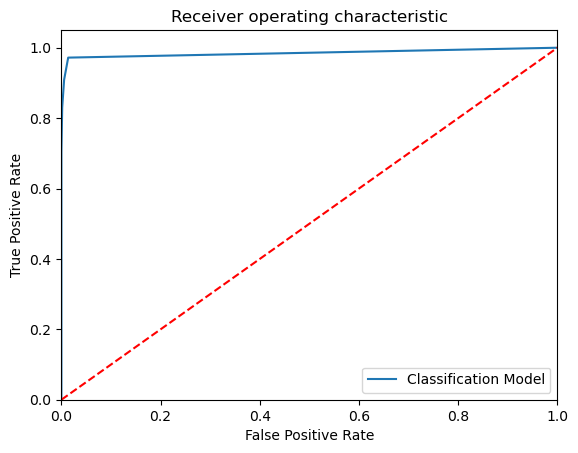

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  779   146]
 [   64 18499]]
Outcome values : 
 779 146 64 18499
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.84      0.88       925
           0       0.99      1.00      0.99     18563

    accuracy                           0.99     19488
   macro avg       0.96      0.92      0.94     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 98.9 %
Precision : 92.4 %
Recall : 84.2 %
F1 Score : 0.881
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 92.0 %
MCC : 0.877
roc_auc_score: 0.919


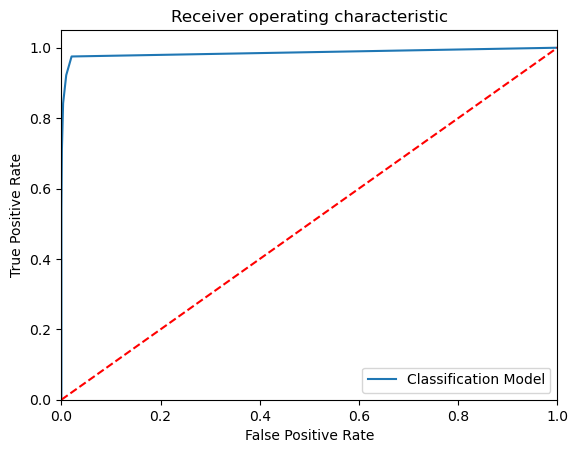

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  666   259]
 [   49 18514]]
Outcome values : 
 666 259 49 18514
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.72      0.81       925
           0       0.99      1.00      0.99     18563

    accuracy                           0.98     19488
   macro avg       0.96      0.86      0.90     19488
weighted avg       0.98      0.98      0.98     19488

Accuracy : 98.4 %
Precision : 93.1 %
Recall : 72.0 %
F1 Score : 0.812
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 85.8 %
MCC : 0.811
roc_auc_score: 0.859


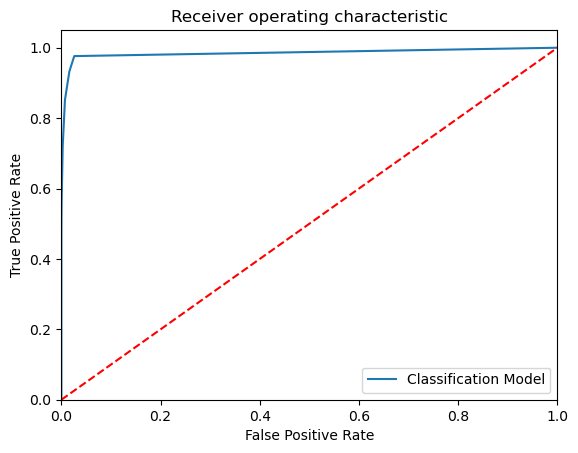

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  681   244]
 [  103 18460]]
Outcome values : 
 681 244 103 18460
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.74      0.80       925
           0       0.99      0.99      0.99     18563

    accuracy                           0.98     19488
   macro avg       0.93      0.87      0.89     19488
weighted avg       0.98      0.98      0.98     19488

Accuracy : 98.2 %
Precision : 86.9 %
Recall : 73.6 %
F1 Score : 0.797
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 86.5 %
MCC : 0.791
roc_auc_score: 0.865


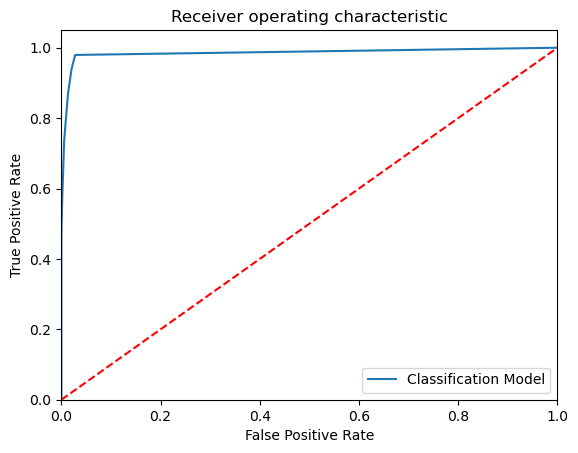

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  544   381]
 [   64 18499]]
Outcome values : 
 544 381 64 18499
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.59      0.71       925
           0       0.98      1.00      0.99     18563

    accuracy                           0.98     19488
   macro avg       0.94      0.79      0.85     19488
weighted avg       0.98      0.98      0.97     19488

Accuracy : 97.7 %
Precision : 89.5 %
Recall : 58.8 %
F1 Score : 0.71
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 79.2 %
MCC : 0.715
roc_auc_score: 0.792


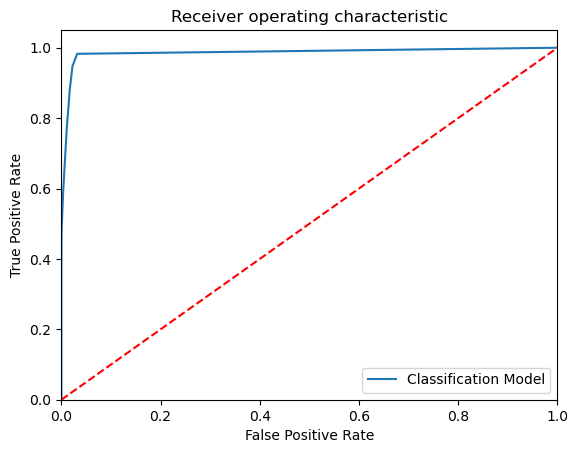

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  576   349]
 [  127 18436]]
Outcome values : 
 576 349 127 18436
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.62      0.71       925
           0       0.98      0.99      0.99     18563

    accuracy                           0.98     19488
   macro avg       0.90      0.81      0.85     19488
weighted avg       0.97      0.98      0.97     19488

Accuracy : 97.6 %
Precision : 81.9 %
Recall : 62.3 %
F1 Score : 0.708
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 80.8 %
MCC : 0.702
roc_auc_score: 0.808


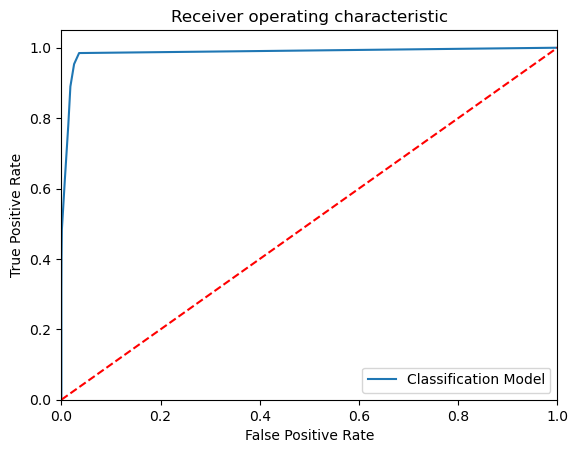

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[  518   407]
 [   88 18475]]
Outcome values : 
 518 407 88 18475
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.56      0.68       925
           0       0.98      1.00      0.99     18563

    accuracy                           0.97     19488
   macro avg       0.92      0.78      0.83     19488
weighted avg       0.97      0.97      0.97     19488

Accuracy : 97.5 %
Precision : 85.5 %
Recall : 56.0 %
F1 Score : 0.677
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 77.8 %
MCC : 0.68
roc_auc_score: 0.778


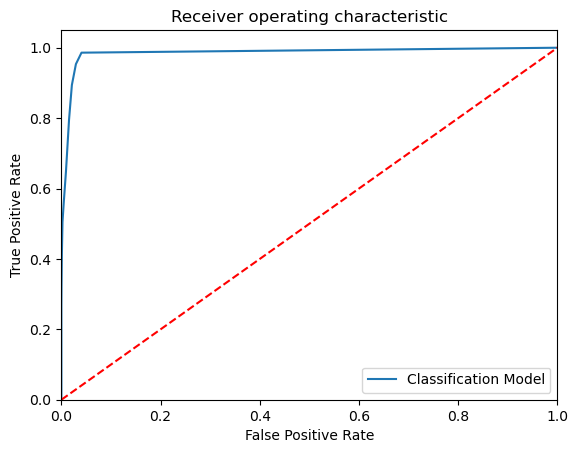

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[  547   378]
 [  110 18453]]
Outcome values : 
 547 378 110 18453
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.59      0.69       925
           0       0.98      0.99      0.99     18563

    accuracy                           0.97     19488
   macro avg       0.91      0.79      0.84     19488
weighted avg       0.97      0.97      0.97     19488

Accuracy : 97.5 %
Precision : 83.3 %
Recall : 59.1 %
F1 Score : 0.692
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 79.2 %
MCC : 0.69
roc_auc_score: 0.793


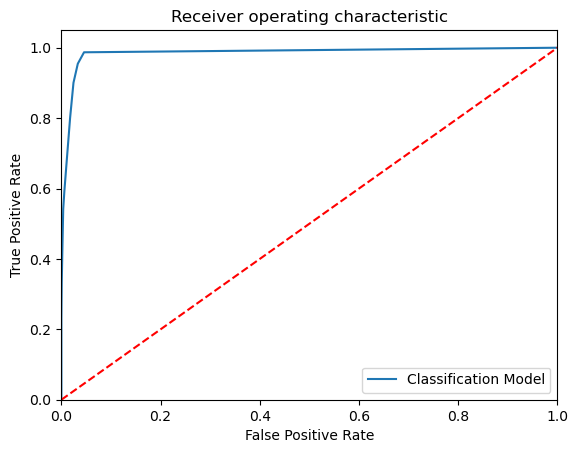

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[  529   396]
 [   89 18474]]
Outcome values : 
 529 396 89 18474
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.57      0.69       925
           0       0.98      1.00      0.99     18563

    accuracy                           0.98     19488
   macro avg       0.92      0.78      0.84     19488
weighted avg       0.97      0.98      0.97     19488

Accuracy : 97.5 %
Precision : 85.6 %
Recall : 57.2 %
F1 Score : 0.686
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 78.4 %
MCC : 0.688
roc_auc_score: 0.784


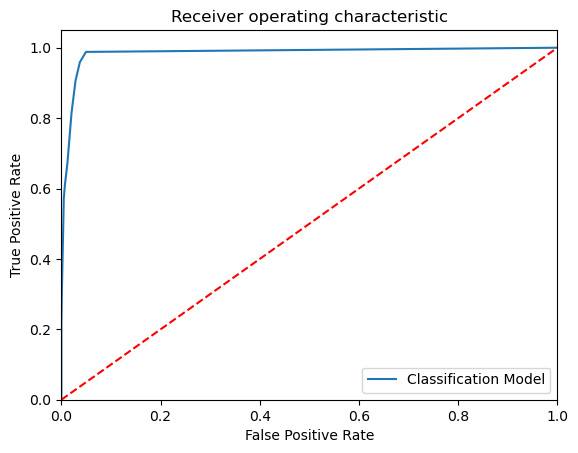

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  546   379]
 [  104 18459]]
Outcome values : 
 546 379 104 18459
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.59      0.69       925
           0       0.98      0.99      0.99     18563

    accuracy                           0.98     19488
   macro avg       0.91      0.79      0.84     19488
weighted avg       0.97      0.98      0.97     19488

Accuracy : 97.5 %
Precision : 84.0 %
Recall : 59.0 %
F1 Score : 0.693
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 79.2 %
MCC : 0.692
roc_auc_score: 0.792


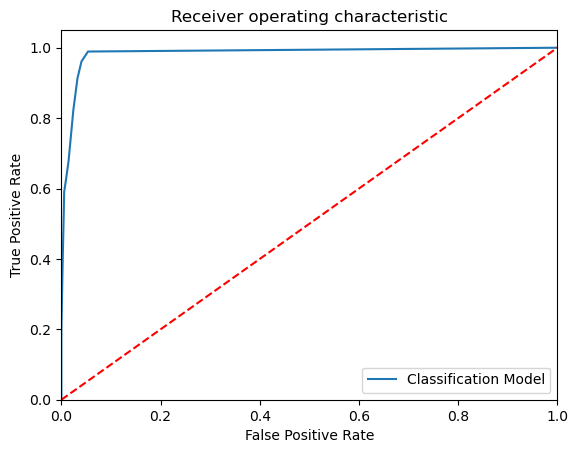

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[  491   434]
 [   97 18466]]
Outcome values : 
 491 434 97 18466
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.53      0.65       925
           0       0.98      0.99      0.99     18563

    accuracy                           0.97     19488
   macro avg       0.91      0.76      0.82     19488
weighted avg       0.97      0.97      0.97     19488

Accuracy : 97.3 %
Precision : 83.5 %
Recall : 53.1 %
F1 Score : 0.649
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 76.3 %
MCC : 0.653
roc_auc_score: 0.763


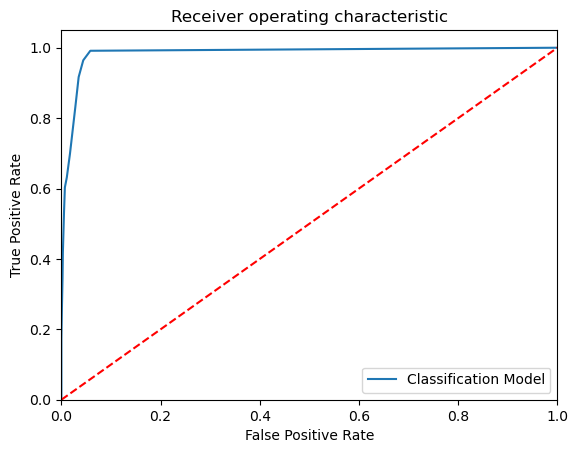

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[  507   418]
 [  115 18448]]
Outcome values : 
 507 418 115 18448
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.55      0.66       925
           0       0.98      0.99      0.99     18563

    accuracy                           0.97     19488
   macro avg       0.90      0.77      0.82     19488
weighted avg       0.97      0.97      0.97     19488

Accuracy : 97.3 %
Precision : 81.5 %
Recall : 54.8 %
F1 Score : 0.655
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 77.1 %
MCC : 0.656
roc_auc_score: 0.771


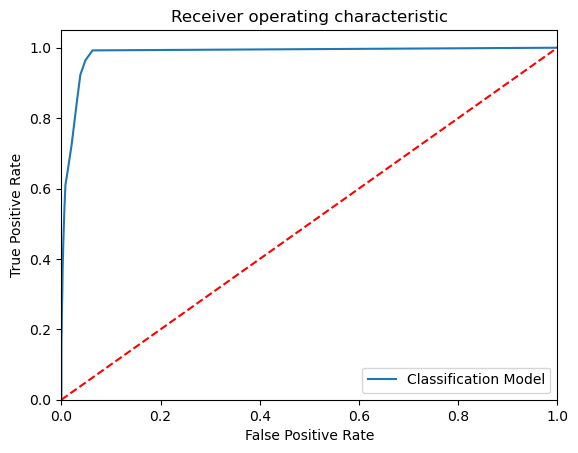

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[  429   496]
 [   81 18482]]
Outcome values : 
 429 496 81 18482
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.46      0.60       925
           0       0.97      1.00      0.98     18563

    accuracy                           0.97     19488
   macro avg       0.91      0.73      0.79     19488
weighted avg       0.97      0.97      0.97     19488

Accuracy : 97.0 %
Precision : 84.1 %
Recall : 46.4 %
F1 Score : 0.598
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 73.0 %
MCC : 0.612
roc_auc_score: 0.73


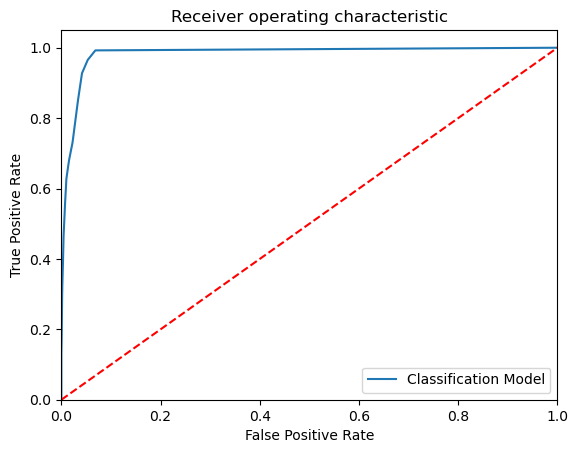

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[  439   486]
 [   99 18464]]
Outcome values : 
 439 486 99 18464
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.47      0.60       925
           0       0.97      0.99      0.98     18563

    accuracy                           0.97     19488
   macro avg       0.90      0.73      0.79     19488
weighted avg       0.97      0.97      0.97     19488

Accuracy : 97.0 %
Precision : 81.6 %
Recall : 47.5 %
F1 Score : 0.6
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 73.5 %
MCC : 0.609
roc_auc_score: 0.735


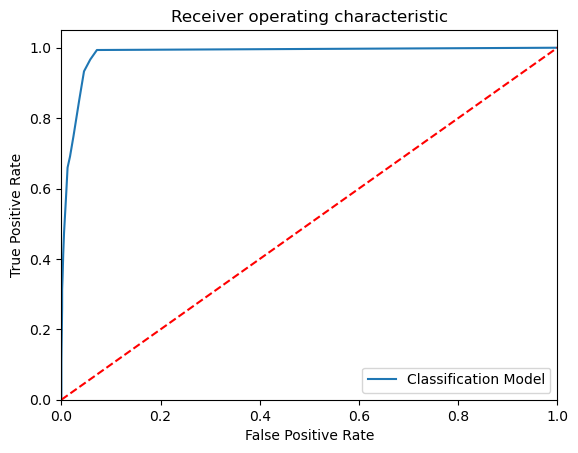

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[  392   533]
 [   83 18480]]
Outcome values : 
 392 533 83 18480
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.42      0.56       925
           0       0.97      1.00      0.98     18563

    accuracy                           0.97     19488
   macro avg       0.90      0.71      0.77     19488
weighted avg       0.97      0.97      0.96     19488

Accuracy : 96.8 %
Precision : 82.5 %
Recall : 42.4 %
F1 Score : 0.56
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 71.0 %
MCC : 0.578
roc_auc_score: 0.71


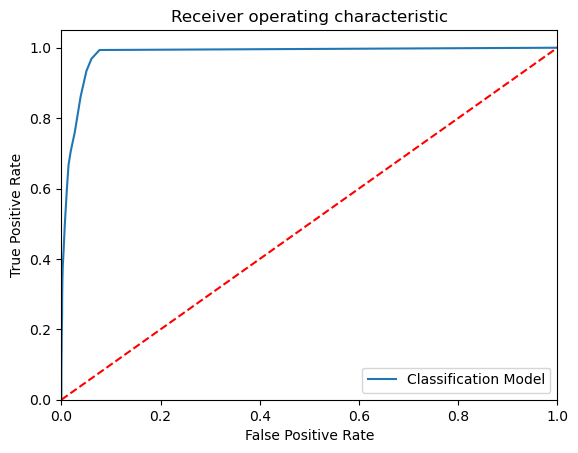

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[  409   516]
 [  106 18457]]
Outcome values : 
 409 516 106 18457
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.44      0.57       925
           0       0.97      0.99      0.98     18563

    accuracy                           0.97     19488
   macro avg       0.88      0.72      0.78     19488
weighted avg       0.96      0.97      0.96     19488

Accuracy : 96.8 %
Precision : 79.4 %
Recall : 44.2 %
F1 Score : 0.568
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 71.8 %
MCC : 0.579
roc_auc_score: 0.718


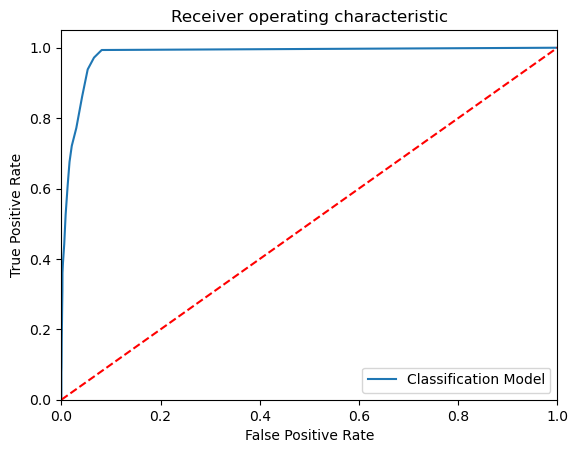

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[  376   549]
 [   84 18479]]
Outcome values : 
 376 549 84 18479
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.41      0.54       925
           0       0.97      1.00      0.98     18563

    accuracy                           0.97     19488
   macro avg       0.89      0.70      0.76     19488
weighted avg       0.96      0.97      0.96     19488

Accuracy : 96.8 %
Precision : 81.7 %
Recall : 40.6 %
F1 Score : 0.543
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 70.0 %
MCC : 0.563
roc_auc_score: 0.701


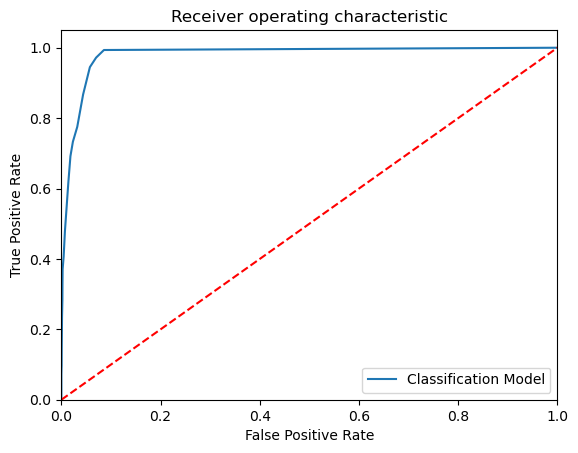

In [21]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------




In [22]:
KNN_Results.head(20)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,851,74,52,18511,0.994,0.942,0.920,0.931,0.997,0.928,0.958599,0.958
1,KNeighborsClassifier(n_neighbors=2),2,804,121,22,18541,0.993,0.973,0.869,0.918,0.999,0.916,0.934002,0.934
2,KNeighborsClassifier(n_neighbors=3),3,829,96,54,18509,0.992,0.939,0.896,0.917,0.997,0.913,0.946654,0.946
3,KNeighborsClassifier(n_neighbors=4),4,768,157,30,18533,0.990,0.962,0.830,0.891,0.998,0.889,0.914327,0.914
4,KNeighborsClassifier(),5,779,146,64,18499,0.989,0.924,0.842,0.881,0.997,0.877,0.919357,0.920
5,KNeighborsClassifier(n_neighbors=6),6,666,259,49,18514,0.984,0.931,0.720,0.812,0.997,0.811,0.858680,0.858
6,KNeighborsClassifier(n_neighbors=7),7,681,244,103,18460,0.982,0.869,0.736,0.797,0.994,0.791,0.865334,0.865
7,KNeighborsClassifier(n_neighbors=8),8,544,381,64,18499,0.977,0.895,0.588,0.710,0.997,0.715,0.792330,0.792
8,KNeighborsClassifier(n_neighbors=9),9,576,349,127,18436,0.976,0.819,0.623,0.708,0.993,0.702,0.807931,0.808
9,KNeighborsClassifier(n_neighbors=10),10,518,407,88,18475,0.975,0.855,0.560,0.677,0.995,0.680,0.777630,0.778


# SVM-Linear Kernel

In [23]:
#load the result dataset for knn

EMResults1= pd.read_csv(r"C:\Users\Dlc\data52\EMResults.csv" ,header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVM - Linear
Confusion matrix : 
 [[    0   925]
 [    0 18563]]
Outcome values : 
 0 925 0 18563
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       925
           0       0.95      1.00      0.98     18563

    accuracy                           0.95     19488
   macro avg       0.48      0.50      0.49     19488
weighted avg       0.91      0.95      0.93     19488

Accuracy : 95.3 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


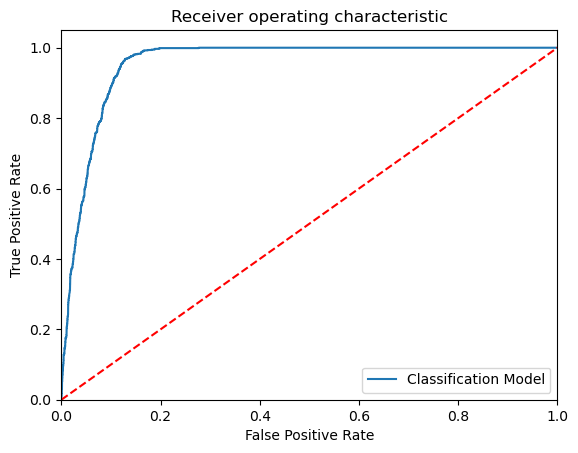

-----------------------------------------------------------------------------------------------------


In [24]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix]

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

In [25]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,925,0,18563,0.953,NaN,0.0,0.0,1.0,NaN,0.5,0.5


# SVM Polynomial Kernel

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[    0   925]
 [    0 18563]]
Outcome values : 
 0 925 0 18563
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       925
           0       0.95      1.00      0.98     18563

    accuracy                           0.95     19488
   macro avg       0.48      0.50      0.49     19488
weighted avg       0.91      0.95      0.93     19488

Accuracy : 95.3 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


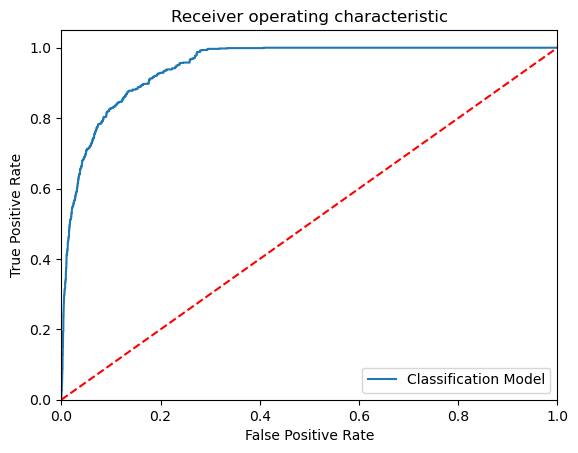

-----------------------------------------------------------------------------------------------------


In [26]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

In [27]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,925,0,18563,0.953,NaN,0.0,0.0,1.0,NaN,0.5,0.5
1,SVM - Polynominal,0,925,0,18563,0.953,NaN,0.0,0.0,1.0,NaN,0.5,0.5


# Gaussian Kernel

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[  919     6]
 [ 4346 14217]]
Outcome values : 
 919 6 4346 14217
Classification report : 
               precision    recall  f1-score   support

           1       0.17      0.99      0.30       925
           0       1.00      0.77      0.87     18563

    accuracy                           0.78     19488
   macro avg       0.59      0.88      0.58     19488
weighted avg       0.96      0.78      0.84     19488

Accuracy : 77.7 %
Precision : 17.5 %
Recall : 99.4 %
F1 Score : 0.297
Specificity or True Negative Rate : 76.6 %
Balanced Accuracy : 88.0 %
MCC : 0.364
roc_auc_score: 0.88


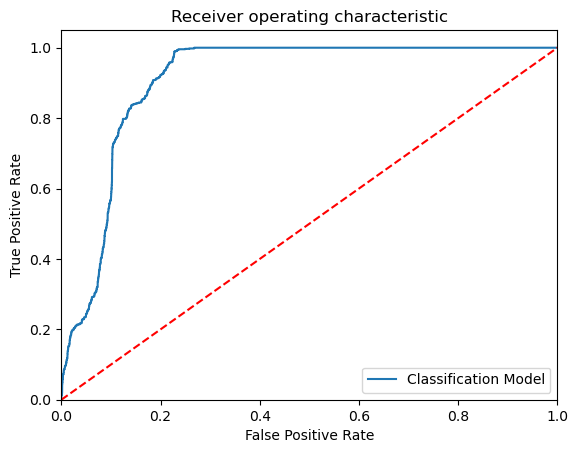

-----------------------------------------------------------------------------------------------------


In [28]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

# Sigmoid Kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[  617   308]
 [ 5865 12698]]
Outcome values : 
 617 308 5865 12698
Classification report : 
               precision    recall  f1-score   support

           1       0.10      0.67      0.17       925
           0       0.98      0.68      0.80     18563

    accuracy                           0.68     19488
   macro avg       0.54      0.68      0.49     19488
weighted avg       0.93      0.68      0.77     19488

Accuracy : 68.3 %
Precision : 9.5 %
Recall : 66.7 %
F1 Score : 0.167
Specificity or True Negative Rate : 68.4 %
Balanced Accuracy : 67.6 %
MCC : 0.158
roc_auc_score: 0.676


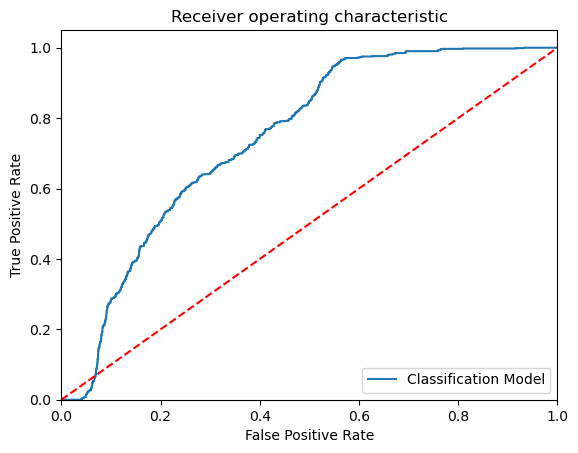

-----------------------------------------------------------------------------------------------------


In [29]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [30]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,925,0,18563,0.953,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynominal,0,925,0,18563,0.953,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,SVM - Gaussian,919,6,4346,14217,0.777,0.175,0.994,0.297,0.766,0.364,0.879696,0.880
3,SVM - Sigmoid,617,308,5865,12698,0.683,0.095,0.667,0.167,0.684,0.158,0.675538,0.676


# Compare the Classification Algorithms

In [31]:
#load the result dataset for knn

EMResults= pd.read_csv(r"C:\Users\Dlc\data52\EMResults.csv" ,header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[    6   919]
 [    6 18557]]
Outcome values : 
 6 919 6 18557
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.01      0.01       925
           0       0.95      1.00      0.98     18563

    accuracy                           0.95     19488
   macro avg       0.73      0.50      0.49     19488
weighted avg       0.93      0.95      0.93     19488

Accuracy : 95.3 %
Precision : 50.0 %
Recall : 0.6 %
F1 Score : 0.013
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.3 %
MCC : 0.053
roc_auc_score: 0.503


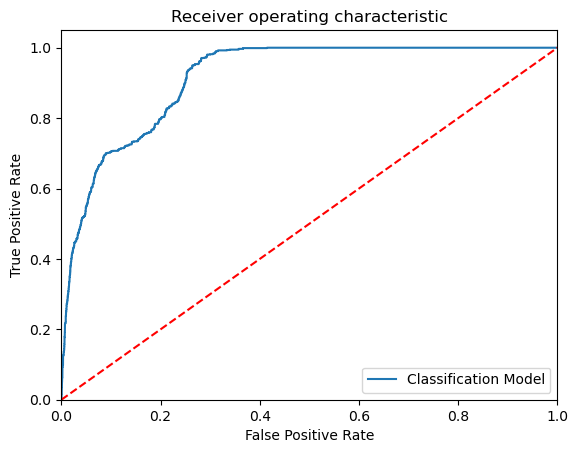

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  822   103]
 [   78 18485]]
Outcome values : 
 822 103 78 18485
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.89      0.90       925
           0       0.99      1.00      1.00     18563

    accuracy                           0.99     19488
   macro avg       0.95      0.94      0.95     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.1 %
Precision : 91.3 %
Recall : 88.9 %
F1 Score : 0.901
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 94.2 %
MCC : 0.896
roc_auc_score: 0.942


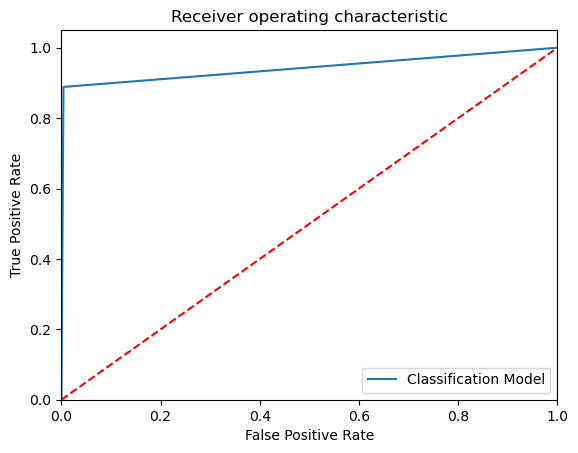

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  855    70]
 [    6 18557]]
Outcome values : 
 855 70 6 18557
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.92      0.96       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.96      0.98     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.6 %
Precision : 99.3 %
Recall : 92.4 %
F1 Score : 0.957
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 96.2 %
MCC : 0.956
roc_auc_score: 0.962


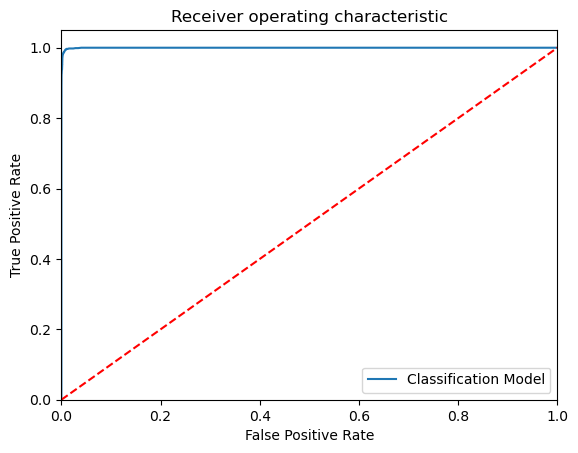

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  860    65]
 [   18 18545]]
Outcome values : 
 860 65 18 18545
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.93      0.95       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.96      0.98     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.6 %
Precision : 97.9 %
Recall : 93.0 %
F1 Score : 0.954
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 96.4 %
MCC : 0.952
roc_auc_score: 0.964


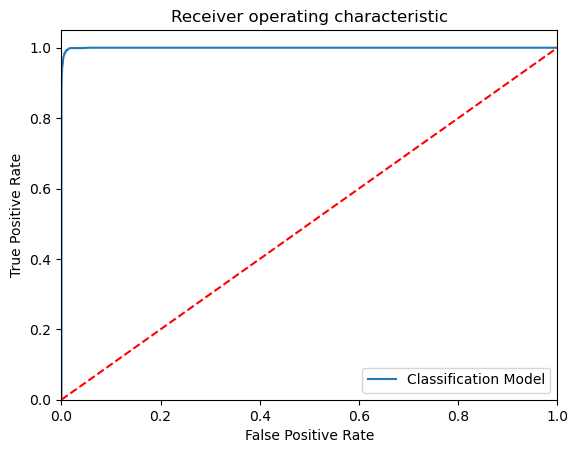

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  779   146]
 [   64 18499]]
Outcome values : 
 779 146 64 18499
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.84      0.88       925
           0       0.99      1.00      0.99     18563

    accuracy                           0.99     19488
   macro avg       0.96      0.92      0.94     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 98.9 %
Precision : 92.4 %
Recall : 84.2 %
F1 Score : 0.881
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 92.0 %
MCC : 0.877
roc_auc_score: 0.919


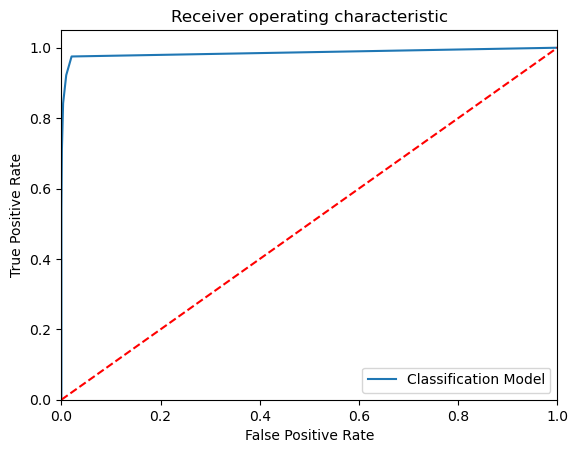

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  925     0]
 [ 5347 13216]]
Outcome values : 
 925 0 5347 13216
Classification report : 
               precision    recall  f1-score   support

           1       0.15      1.00      0.26       925
           0       1.00      0.71      0.83     18563

    accuracy                           0.73     19488
   macro avg       0.57      0.86      0.54     19488
weighted avg       0.96      0.73      0.80     19488

Accuracy : 72.6 %
Precision : 14.7 %
Recall : 100.0 %
F1 Score : 0.257
Specificity or True Negative Rate : 71.2 %
Balanced Accuracy : 85.6 %
MCC : 0.324
roc_auc_score: 0.856


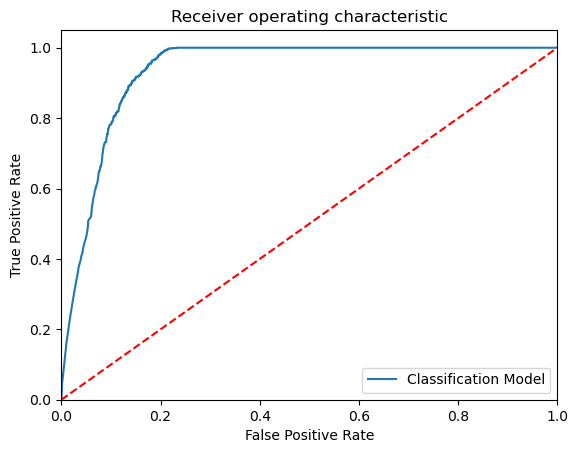

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   71   854]
 [   23 18540]]
Outcome values : 
 71 854 23 18540
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.08      0.14       925
           0       0.96      1.00      0.98     18563

    accuracy                           0.95     19488
   macro avg       0.86      0.54      0.56     19488
weighted avg       0.95      0.95      0.94     19488

Accuracy : 95.5 %
Precision : 75.5 %
Recall : 7.7 %
F1 Score : 0.139
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 53.8 %
MCC : 0.232
roc_auc_score: 0.538


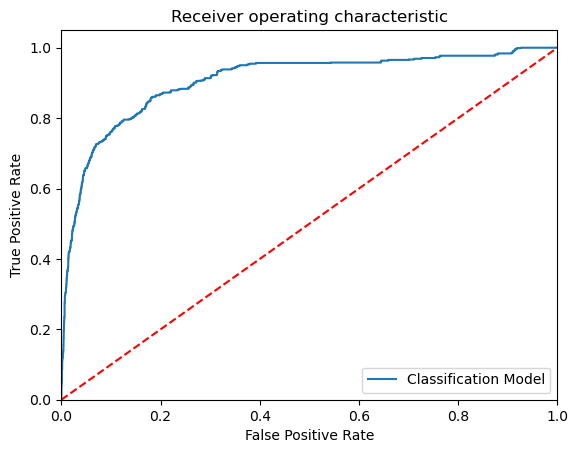

-----------------------------------------------------------------------------------------------------


In [32]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults=EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>




In [33]:
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),6,919,6,18557,0.953,0.500,0.006,0.013,1.000,0.053,0.503082,0.503
1,DecisionTreeClassifier(),822,103,78,18485,0.991,0.913,0.889,0.901,0.996,0.896,0.942223,0.942
2,"(DecisionTreeClassifier(max_features='auto', r...",855,70,6,18557,0.996,0.993,0.924,0.957,1.000,0.956,0.962001,0.962
3,"(ExtraTreeClassifier(random_state=1268329415),...",860,65,18,18545,0.996,0.979,0.930,0.954,0.999,0.952,0.964380,0.964
4,KNeighborsClassifier(),779,146,64,18499,0.989,0.924,0.842,0.881,0.997,0.877,0.919357,0.920


In [36]:
#PREDICT the values with KNN algorithm

y_predRF=ModelRF.predict(x_test)

In [37]:
#display the final results

Results =pd.DataFrame({'is_preparatory_A':y_test,'is_preparatory_P':y_pred})

#merge two Dataframes on index of both the dataframes
ResultsFinal=iit_bk.merge(Results,left_index=True,right_index=True)

#display 5 records randomly

ResultsFinal.sample(10)

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory,is_preparatory_A,is_preparatory_P
58845,30127,2021,NIT,1,HS,Gender-Neutral,NIT-Jamshedpur,Electrical Engineering,4 Years,B.Tech,OBC-NCL-PWD,465,465,0,0,0
33669,18102,2019,NIT,7,OS,Gender-Neutral,NIT-Jaipur,Electronics and Communication Engineering,4 Years,B.Tech,OBC-NCL,2619,3529,0,0,0
57652,29935,2021,NIT,1,OS,Gender-Neutral,NIT-Sikkim,Civil Engineering,4 Years,B.Tech,GEN,37637,41655,0,0,0
50309,28690,2021,NIT,1,OS,Gender-Neutral,NIT-Durgapur,Electronics and Communication Engineering,4 Years,B.Tech,SC,1948,2350,0,0,0
16745,10496,2021,IIT,1,AI,Female-Only,IIT-Guwahati,Computer Science and Engineering,4 Years,B.Tech,ST,151,332,0,0,0
52583,29064,2021,NIT,1,HS,Female-Only,NIT-Hamirpur,Mechanical Engineering,4 Years,B.Tech,GEN-EWS,22760,22760,0,0,0
15035,10185,2021,IIT,1,AI,Female-Only,IIT-Madras,Computer Science and Engineering,4 Years,B.Tech,SC,139,196,0,0,0
7729,7729,2020,IIT,6,AI,Gender-Neutral,IIT-Jodhpur,Electrical Engineering,4 Years,B.Tech,OBC-NCL,1549,2711,0,0,0
13924,9974,2021,IIT,1,AI,Gender-Neutral,IIT-Kanpur,Biological Sciences and Bioengineering,4 Years,B.Tech,GEN,4610,6596,0,0,0
43849,27632,2021,NIT,1,OS,Female-Only,NIT-Bhopal,Chemical Engineering,4 Years,B.Tech,SC,7230,7230,0,0,0
